<a href="https://colab.research.google.com/github/11471a0205/Stock_Prediction_Project/blob/main/LSTM_and_Stacked_Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as apprcepd_pdsn

In [ ]:
apprcepdta = apprcepd_pdsn.read_csv("preprocessed_apple_stocks.csv")

In [ ]:
apprcepdta

,Date,Close/Last
0,2024-07-05,226.3400
1,2024-07-03,221.5500
2,2024-07-02,220.2700
3,2024-07-01,216.7500
4,2024-06-28,210.6200
...,...,...
2512,2014-07-11,23.8050
2513,2014-07-10,23.7587
2514,2014-07-09,23.8475
2515,2014-07-08,23.8375


In [ ]:
apprcepdta.shape

(2517, 2)

In [ ]:
import warnings as apprce_wgnisn
apprce_wgnisn.filterwarnings('ignore')
import numpy as apprcenmp

In [ ]:
def apprc_stkd(S, N):
  apprc_stkX = []
  apprc_stkY = []
  for f in range(len(S)):
    rest = f + N
    if rest > len(S)-1:
      break
    apprc_rstIp, apprc_rstOp = S[f:rest], S[rest]
    apprc_stkX.append(apprc_rstIp)
    apprc_stkY.append(apprc_rstOp)
  return apprcenmp.array(apprc_stkX), apprcenmp.array(apprc_stkY)

In [ ]:

N = 10
apprc_stkXt, apprc_stkYt = apprc_stkd(apprcepdta['Close/Last'][:-100].tolist(), N)

apprc_stkXs, apprc_stkYs = apprc_stkd(apprcepdta['Close/Last'][-100:].tolist(), N)
for m in range(len(apprc_stkXs)):
  print(apprc_stkXs[m], apprc_stkYs[m])

[29.6563 29.1175 29.0775 28.6675 28.8675 28.4975 28.545  28.205  27.8125
 27.425 ] 27.2075
[29.1175 29.0775 28.6675 28.8675 28.4975 28.545  28.205  27.8125 27.425
 27.2075] 27.2525
[29.0775 28.6675 28.8675 28.4975 28.545  28.205  27.8125 27.425  27.2075
 27.2525] 27.175
[28.6675 28.8675 28.4975 28.545  28.205  27.8125 27.425  27.2075 27.2525
 27.175 ] 27.215
[28.8675 28.4975 28.545  28.205  27.8125 27.425  27.2075 27.2525 27.175
 27.215 ] 27.15
[28.4975 28.545  28.205  27.8125 27.425  27.2075 27.2525 27.175  27.215
 27.15  ] 27.35
[28.545  28.205  27.8125 27.425  27.2075 27.2525 27.175  27.215  27.15
 27.35  ] 27.0
[28.205  27.8125 27.425  27.2075 27.2525 27.175  27.215  27.15   27.35
 27.    ] 26.745
[27.8125 27.425  27.2075 27.2525 27.175  27.215  27.15   27.35   27.
 26.745 ] 26.835
[27.425  27.2075 27.2525 27.175  27.215  27.15   27.35   27.     26.745
 26.835 ] 26.685
[27.2075 27.2525 27.175  27.215  27.15   27.35   27.     26.745  26.835
 26.685 ] 26.2775
[27.2525 27.175  27.215 

In [ ]:
#### real output with respective date
apprc_stkYs_LT= apprc_stkYs
Prec_Tessk_D =(apprcepdta['Date'][-100:-10].tolist())

In [ ]:
apprc_stkXt.shape

(2407, 10)

In [ ]:
apprc_stkXs.shape

(90, 10)

In [ ]:
apprc_stkXt = apprc_stkXt.reshape(apprc_stkXt.shape[0],apprc_stkXt.shape[1] , 1)
print("Training Data after Reshaped : ", apprc_stkXt.shape)

Training Data after Reshaped :  (2407, 10, 1)


In [ ]:
apprc_stkXs = apprc_stkXs.reshape(apprc_stkXs.shape[0],apprc_stkXs.shape[1] , 1)
print("Testing Data after Reshaped : ", apprc_stkXs.shape)

Testing Data after Reshaped :  (90, 10, 1)


In [ ]:
from tensorflow.keras.layers import LSTM as apprclngtm
from tensorflow.keras.models import Sequential as apprcsqntl
from tensorflow.keras.layers import Dense as apprcdse
from sklearn.metrics import mean_absolute_error as apprcmanse
from sklearn.metrics import mean_squared_error as apprcmansqr
from sklearn.metrics import r2_score as apprcr2scr
import math as apprcmth
import matplotlib.pyplot as apprcep_mplit

appr_actvnfct = 'relu'
apprce_lsfctn = 'mean_squared_error'

**LSTM (Optimizers)**

In [ ]:
apprc_stkXt = apprc_stkXt.astype(apprcenmp.float32)
apprc_stkXs = apprc_stkXs.astype(apprcenmp.float32)
print(apprc_stkXt.shape)

(2407, 10, 1)


...............................................................................
              LSTM using the Optimizer  adam
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 9022.0479
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 158.4946
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 12.3940
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 10.2704
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 6.2507
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.0228
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.2884
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1211
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.9282
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8423
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0948
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss

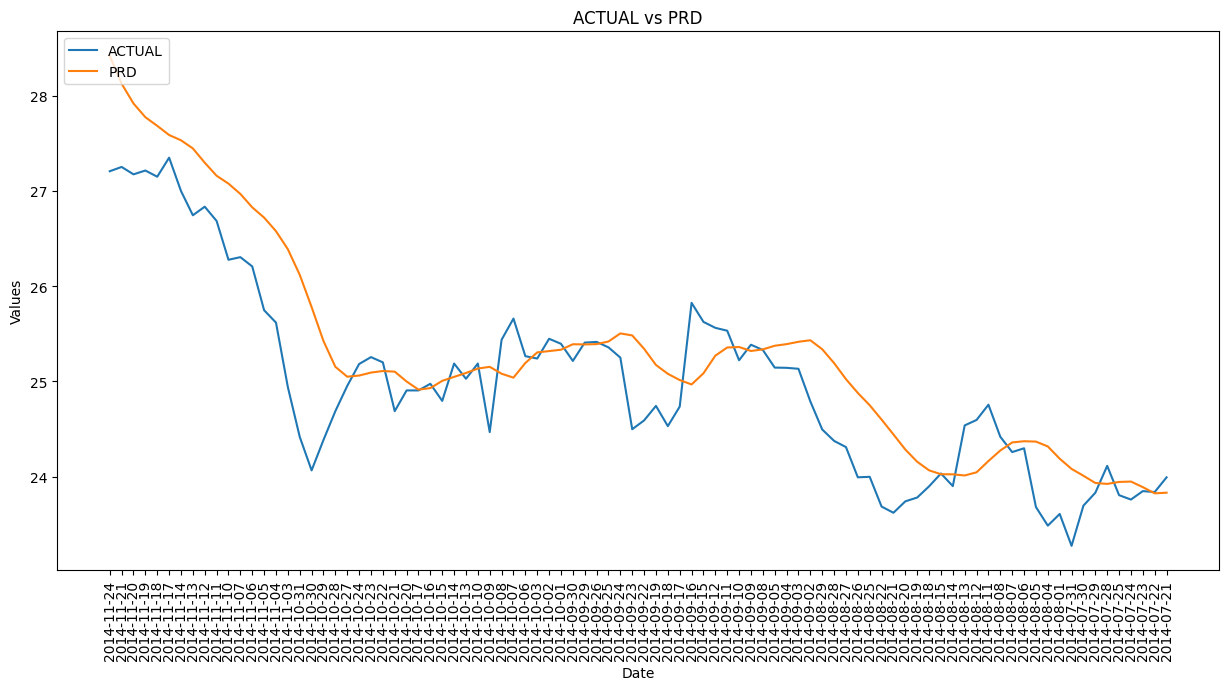

...............................................................................
              LSTM using the Optimizer  rmsprop
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5312.9297
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 88.0739
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 76.3865
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 38.9093
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 21.3308
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 34.5968
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 39.0290
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 20.3525
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 38.7190
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 24.4876
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 28.3639
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/ste

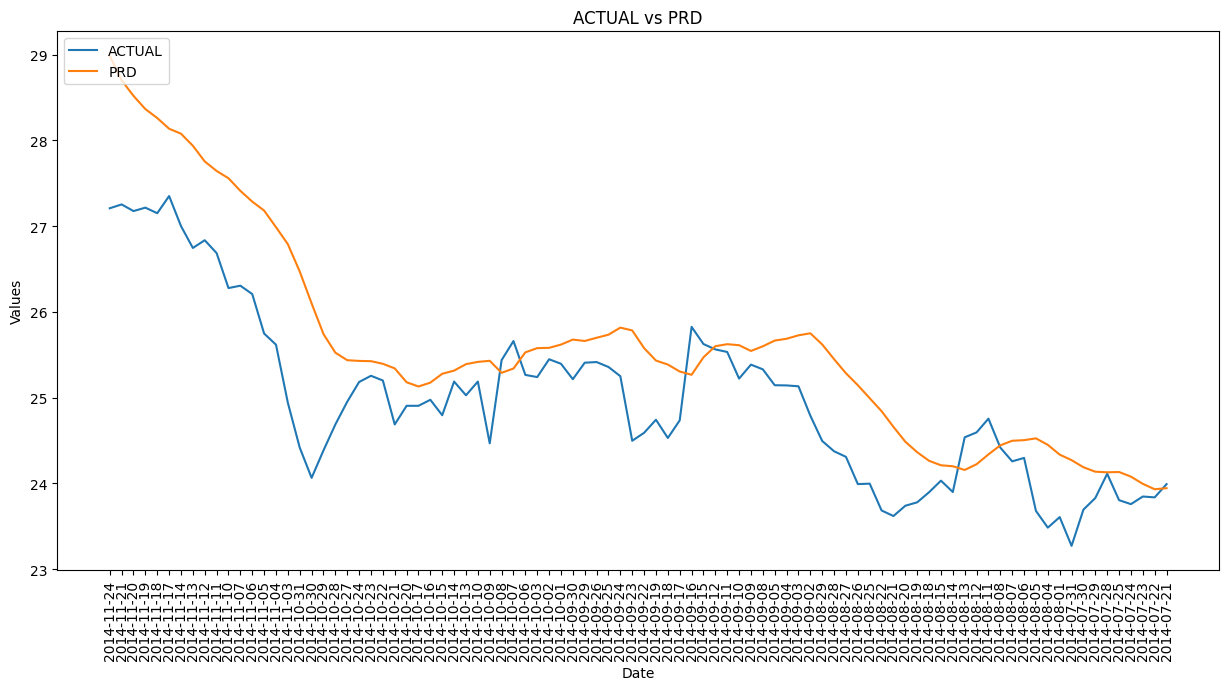

...............................................................................
              LSTM using the Optimizer  adamax
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 11125.9131
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 6884.9678
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 1168.2982
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 77.6962
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 48.9083
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 21.5604
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.6165
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.7266
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.8971
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.7735
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.8612
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/st

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Evaluation of Apple Stock on LSTM

Score of R2   : 42.26868921092346
Score of MAE  : 0.6081694911702473
Score of MSE  : 0.5779514726074717
Score of RMSE : 0.7602311968128326
 ************************ 
             ACTUAL                   PRD
Date                                     
2014-11-24  27.2075  [28.887699127197266]
2014-11-21  27.2525   [28.62190818786621]
2014-11-20  27.1750   [28.44681167602539]
2014-11-19  27.2150   [28.27086067199707]
2014-11-18  27.1500   [28.14193344116211]
...             ...                   ...
2014-07-25  23.8050   [23.87999725341797]
2014-07-24  23.7587   [23.76622200012207]
2014-07-23  23.8475  [23.650291442871094]
2014-07-22  23.8375  [23.511653900146484]
2014-07-21  23.9920  [23.511863708496094]

[90 rows x 2 columns]


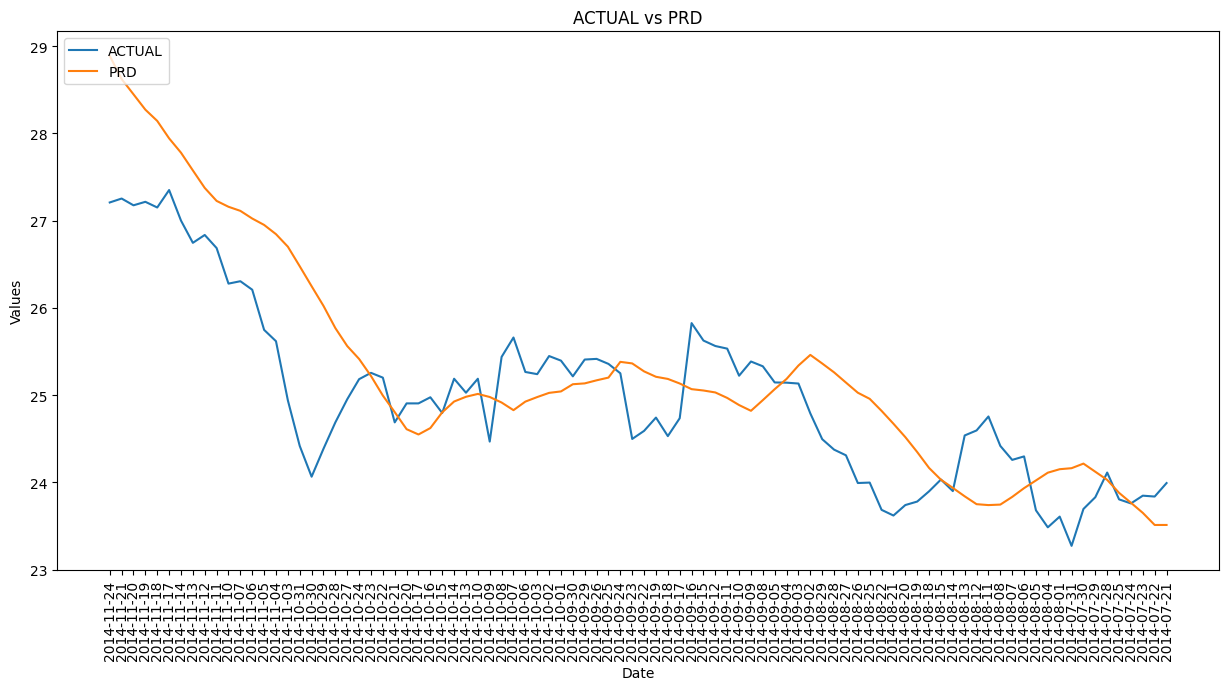

In [ ]:
for apprcd_optmer in ['adam', 'rmsprop', 'adamax']:
  print("...............................................................................")
  print("              LSTM using the Optimizer ", apprcd_optmer)
  print("...............................................................................\n")
  apprcdrmdle = apprcsqntl()
  apprcdrmdle.add(apprclngtm(100, input_shape=(None,1), activation=appr_actvnfct))
  apprcdrmdle.add(apprcdse(1))

  apprcdrmdle.compile(loss= apprce_lsfctn, optimizer= apprcd_optmer)
  apprcdrhstry = apprcdrmdle.fit(apprc_stkXt, apprc_stkYt, epochs = 20, batch_size = 200)
  apprcdrprd = apprcdrmdle.predict(apprc_stkXs)

  print("\nEvaluation of Apple Stock on LSTM\n")

  print("Score of R2   :", apprcr2scr(apprc_stkYs, apprcdrprd)*100)
  print("Score of MAE  :", apprcmanse(apprc_stkYs, apprcdrprd))
  print("Score of MSE  :", apprcmansqr(apprc_stkYs, apprcdrprd))
  print("Score of RMSE :", apprcmth.sqrt(apprcmansqr(apprc_stkYs, apprcdrprd)))
  print(" ************************ ")

  # dataframe
  apprcepd_DF = apprcepd_pdsn.DataFrame()
  apprcepd_DF['ACTUAL']=apprc_stkYs_LT.tolist()
  apprcepd_DF['PRD']=apprcdrprd.tolist()
  apprcepd_DF['Date']=Prec_Tessk_D
  apprcepd_DF=apprcepd_DF.set_index("Date")
  print(apprcepd_DF)

  ### ACTUAL vs PRD
  apprcep_mplit.figure(figsize=(15, 7))
  apprcep_mplit.xlabel("Date")
  apprcep_mplit.ylabel("Values")
  apprcep_mplit.title("ACTUAL vs PRD")
  apprcep_mplit.xticks(rotation=90)
  apprcep_mplit.plot(apprcepd_DF['ACTUAL'], label="ACTUAL")
  apprcep_mplit.plot(apprcepd_DF['PRD'].tolist(), label="PRD")
  apprcep_mplit.legend(loc="upper left")
  apprcep_mplit.show()

**Best optimizer of LSTM is - adam**

**LSTM (Epochs)**

...............................................................................
              LSTM using the Epochs  20
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4581.8516
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 125.9969
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 18.2256
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 14.6050
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 12.5914
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 15.6579
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 12.5747
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 12.4217
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 12.9805
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 11.6209
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.7665
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss

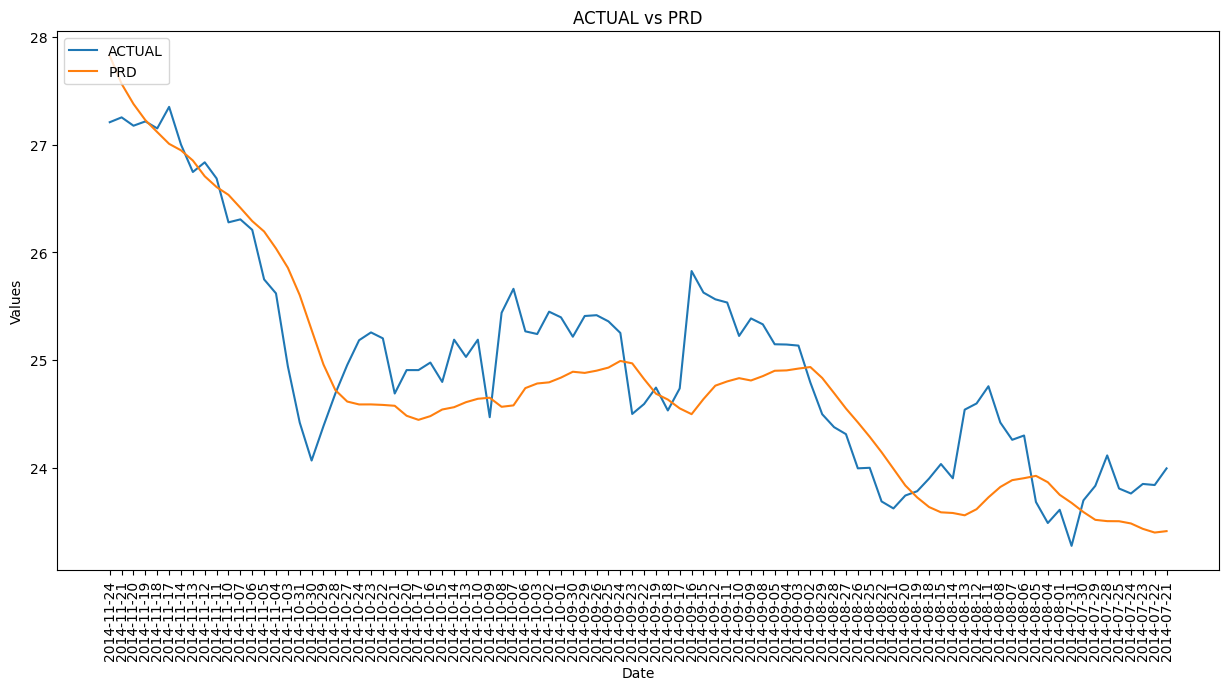

...............................................................................
              LSTM using the Epochs  30
...............................................................................

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3643.7690
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 30.8925
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 13.2203
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 8.9272
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 7.5604
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 5.3496
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 5.1023
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 4.2167
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.4118
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.7558
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.8717
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3944

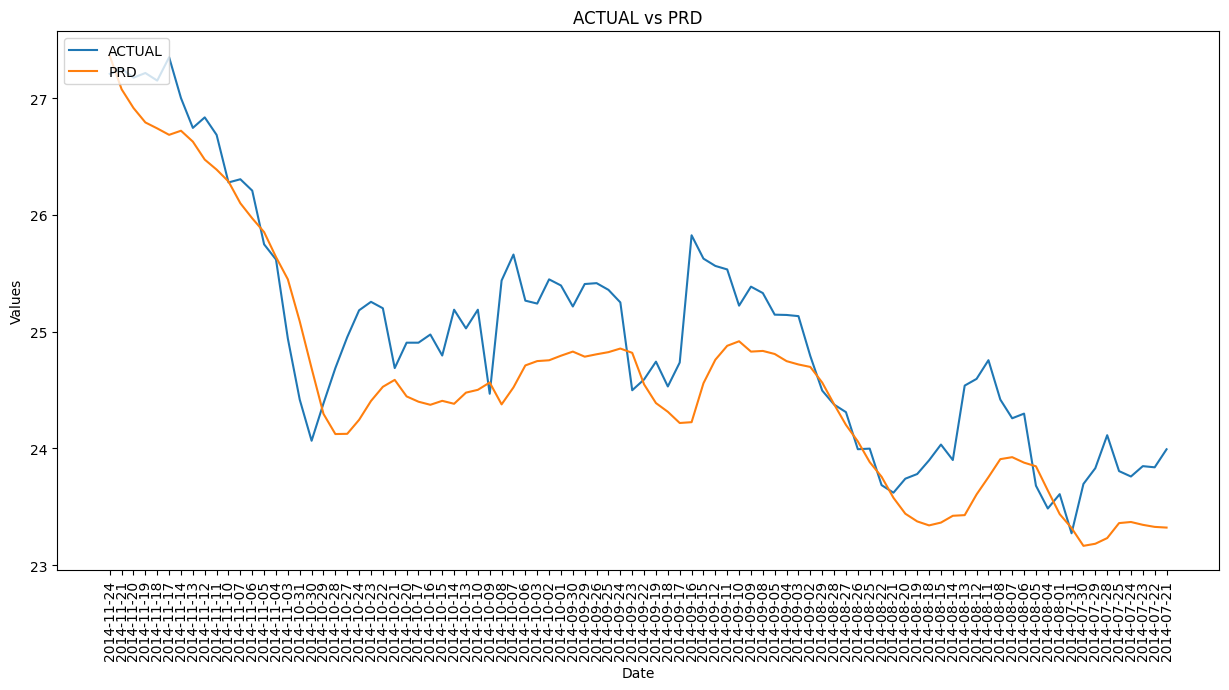

...............................................................................
              LSTM using the Epochs  50
...............................................................................

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3090.9116
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 21.9108
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 12.1360
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 12.8596
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.5967
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.8466
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.6359
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.2944
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.6880
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.6007
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 6.0121
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 4.856

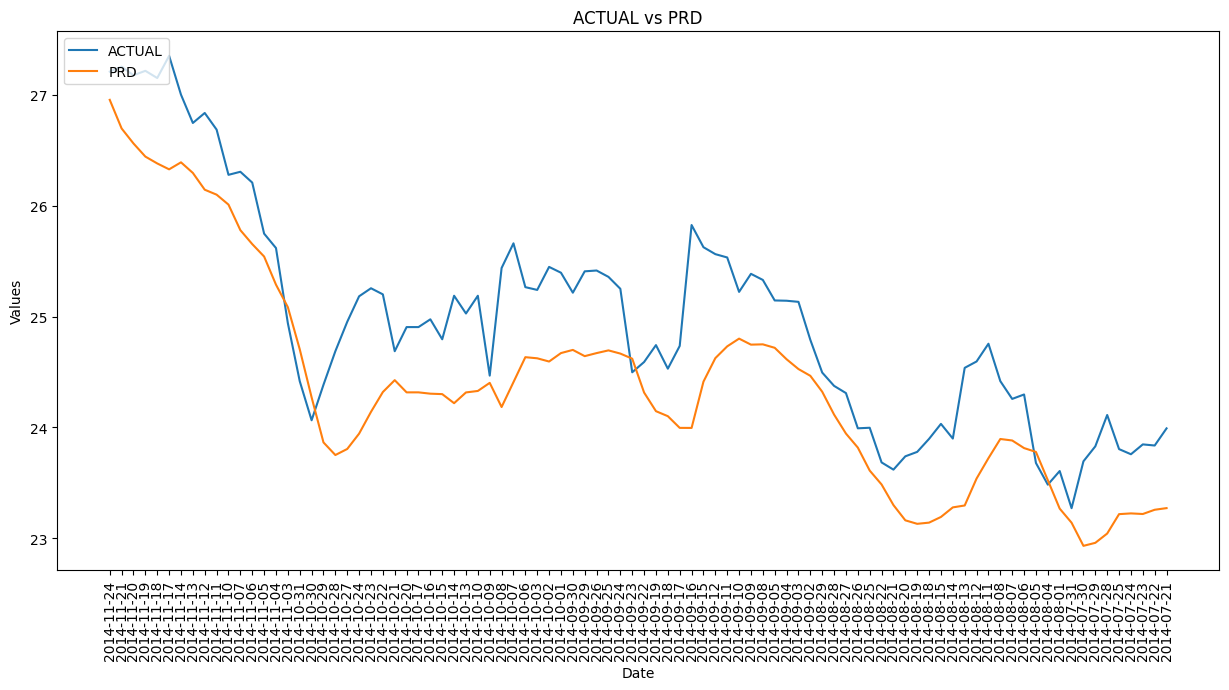

In [ ]:
for apprcd_ephs in [20, 30, 50]:
  print("...............................................................................")
  print("              LSTM using the Epochs ", apprcd_ephs)
  print("...............................................................................\n")
  apprcdrmdle = apprcsqntl()
  apprcdrmdle.add(apprclngtm(100, input_shape=(None,1), activation=appr_actvnfct))
  apprcdrmdle.add(apprcdse(1))
  apprcdrmdle.compile(loss= apprce_lsfctn, optimizer= 'adam')
  apprcdrhstry = apprcdrmdle.fit(apprc_stkXt, apprc_stkYt, epochs = apprcd_ephs, batch_size = 200)
  apprcdrprd = apprcdrmdle.predict(apprc_stkXs)
  print("\nEvaluation of Apple Stock on LSTM\n")
  print("Score of R2   :", apprcr2scr(apprc_stkYs, apprcdrprd)*100)
  print("Score of MAE  :", apprcmanse(apprc_stkYs, apprcdrprd))
  print("Score of MSE  :", apprcmansqr(apprc_stkYs, apprcdrprd))
  print("Score of RMSE :", apprcmth.sqrt(apprcmansqr(apprc_stkYs, apprcdrprd)))
  print(" ************************ ")

  # dataframe
  apprcepd_DF = apprcepd_pdsn.DataFrame()
  apprcepd_DF['ACTUAL']=apprc_stkYs_LT.tolist()
  apprcepd_DF['PRD']=apprcdrprd.tolist()
  apprcepd_DF['Date']=Prec_Tessk_D
  apprcepd_DF=apprcepd_DF.set_index("Date")
  print(apprcepd_DF)

  ### ACTUAL vs PRD
  apprcep_mplit.figure(figsize=(15, 7))
  apprcep_mplit.xlabel("Date")
  apprcep_mplit.ylabel("Values")
  apprcep_mplit.title("ACTUAL vs PRD")
  apprcep_mplit.xticks(rotation=90)
  apprcep_mplit.plot(apprcepd_DF['ACTUAL'], label="ACTUAL")
  apprcep_mplit.plot(apprcepd_DF['PRD'].tolist(), label="PRD")
  apprcep_mplit.legend(loc="upper left")
  apprcep_mplit.show()

**Stacked LSTM (Optimizers)**

...............................................................................
             Stacked LSTM using the Optimizer  adam
...............................................................................

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 5391.7505
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 74.3359
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 40.9522
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 25.9331
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 31.2248
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 15.7562
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 12.2362
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 24.4591
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 12.4438
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 16.9970
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step

Evaluation of Apple Stock on Stacked-LSTM

Score of R2   : -74.807534884

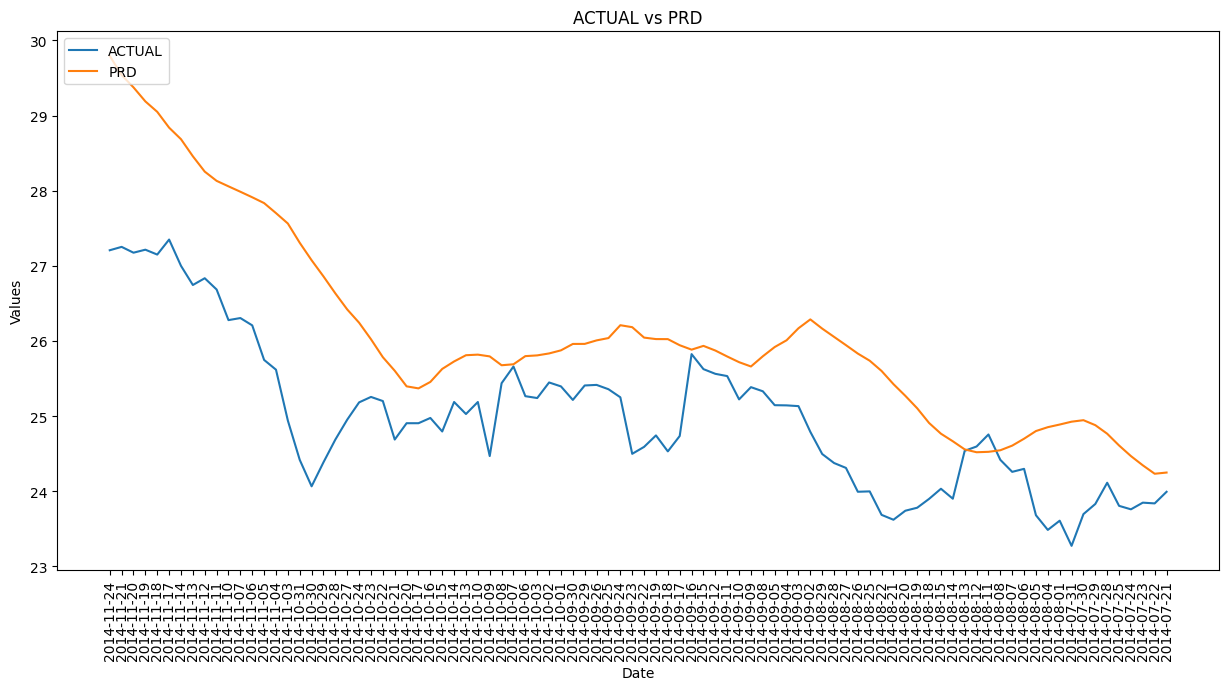

...............................................................................
             Stacked LSTM using the Optimizer  rmsprop
...............................................................................

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 3205.7957
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 39.3618
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 71.1171
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 107.8618
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 96.0841
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 76.0083
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 65.6751
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 50.5575
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 51.0396
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 91.8341
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step

Evaluation of Apple Stock on Stacked-LSTM

Score of R2   : -420.547

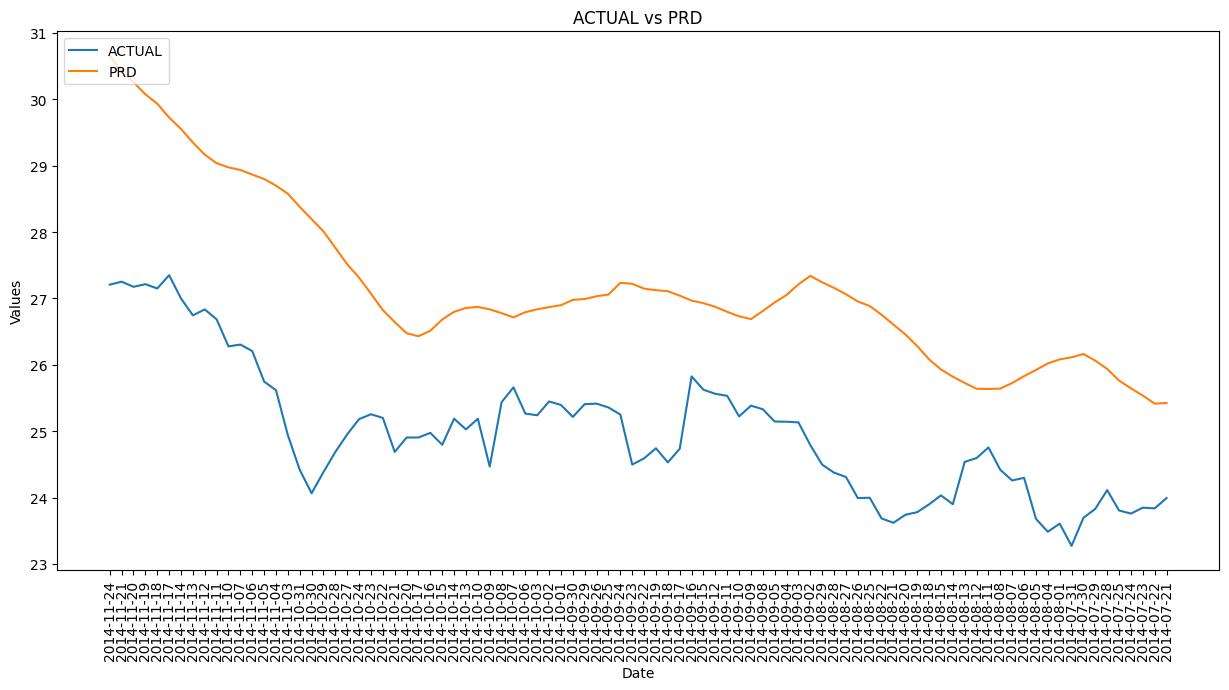

...............................................................................
             Stacked LSTM using the Optimizer  adamax
...............................................................................

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 8221.2773
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 246.1131
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 48.7668
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 16.1401
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 9.8561 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 6.6121 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 6.8338
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 5.6706
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 7.4021
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 5.6343
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step

Evaluation of Apple Stock on Stacked-LSTM

Score of R2   : 34.98237688783

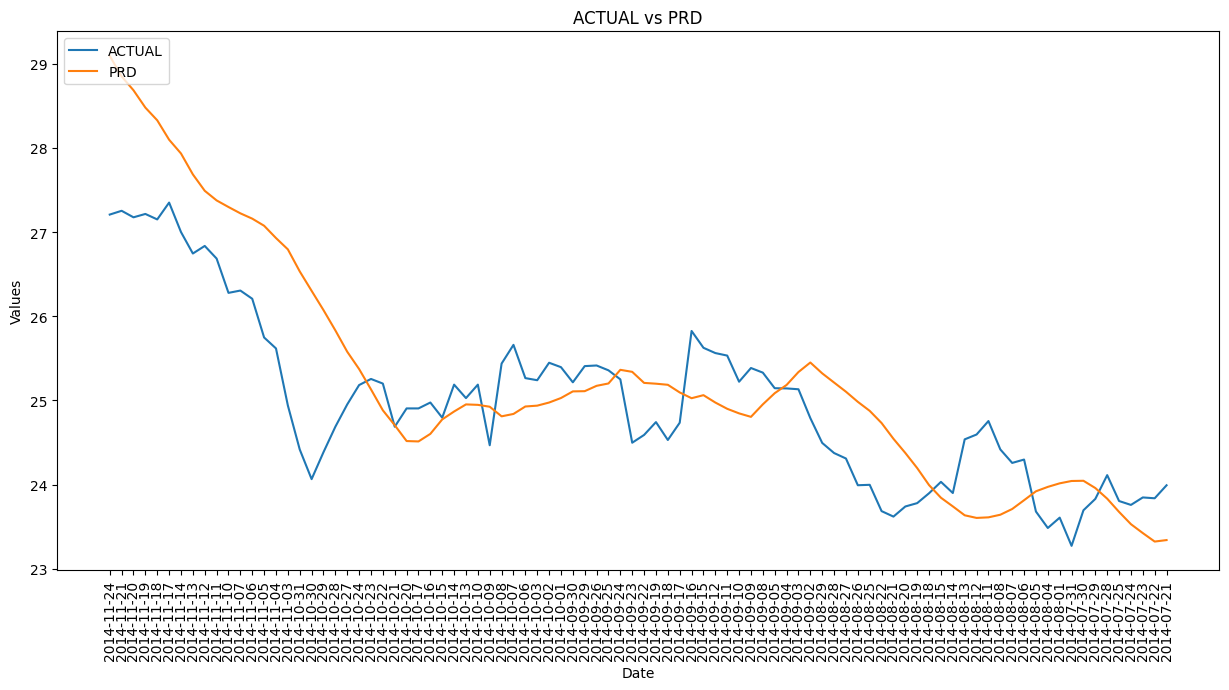

In [ ]:
for apprcd_optmer in ['adam', 'rmsprop', 'adamax']:
  print("...............................................................................")
  print("             Stacked LSTM using the Optimizer ", apprcd_optmer)
  print("...............................................................................\n")
  apprcdrmdle = apprcsqntl()
  apprcdrmdle.add(apprclngtm(200, input_shape=(None,1), activation=appr_actvnfct, return_sequences=True))
  apprcdrmdle.add(apprclngtm(100, input_shape=(None,1), activation=appr_actvnfct))
  apprcdrmdle.add(apprcdse(1))

  apprcdrmdle.compile(loss= apprce_lsfctn, optimizer= apprcd_optmer)
  apprcdrhstry = apprcdrmdle.fit(apprc_stkXt, apprc_stkYt, epochs = 10, batch_size = 200)
  apprcdrprd = apprcdrmdle.predict(apprc_stkXs)

  print("\nEvaluation of Apple Stock on Stacked-LSTM\n")

  print("Score of R2   :", apprcr2scr(apprc_stkYs, apprcdrprd)*100)
  print("Score of MAE  :", apprcmanse(apprc_stkYs, apprcdrprd))
  print("Score of MSE  :", apprcmansqr(apprc_stkYs, apprcdrprd))
  print("Score of RMSE :", apprcmth.sqrt(apprcmansqr(apprc_stkYs, apprcdrprd)))
  print(" ************************ ")

  # dataframe
  apprcepd_DF = apprcepd_pdsn.DataFrame()
  apprcepd_DF['ACTUAL']=apprc_stkYs_LT.tolist()
  apprcepd_DF['PRD']=apprcdrprd.tolist()
  apprcepd_DF['Date']=Prec_Tessk_D
  apprcepd_DF=apprcepd_DF.set_index("Date")
  print(apprcepd_DF)

  ### ACTUAL vs PRD
  apprcep_mplit.figure(figsize=(15, 7))
  apprcep_mplit.xlabel("Date")
  apprcep_mplit.ylabel("Values")
  apprcep_mplit.title("ACTUAL vs PRD")
  apprcep_mplit.xticks(rotation=90)
  apprcep_mplit.plot(apprcepd_DF['ACTUAL'], label="ACTUAL")
  apprcep_mplit.plot(apprcepd_DF['PRD'].tolist(), label="PRD")
  apprcep_mplit.legend(loc="upper left")
  apprcep_mplit.show()

**Best optimizer of stacked LSTM is - adamax**

**Stacked LSTM (Epochs)**

...............................................................................
             Stacked LSTM using the Epochs  20
...............................................................................

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 6841.6152
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 203.5879
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 46.7594
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 19.1815
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 16.4678
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 14.9239
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 13.5843
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 13.2729
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 12.7904
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 12.4807
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 11.7064
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms

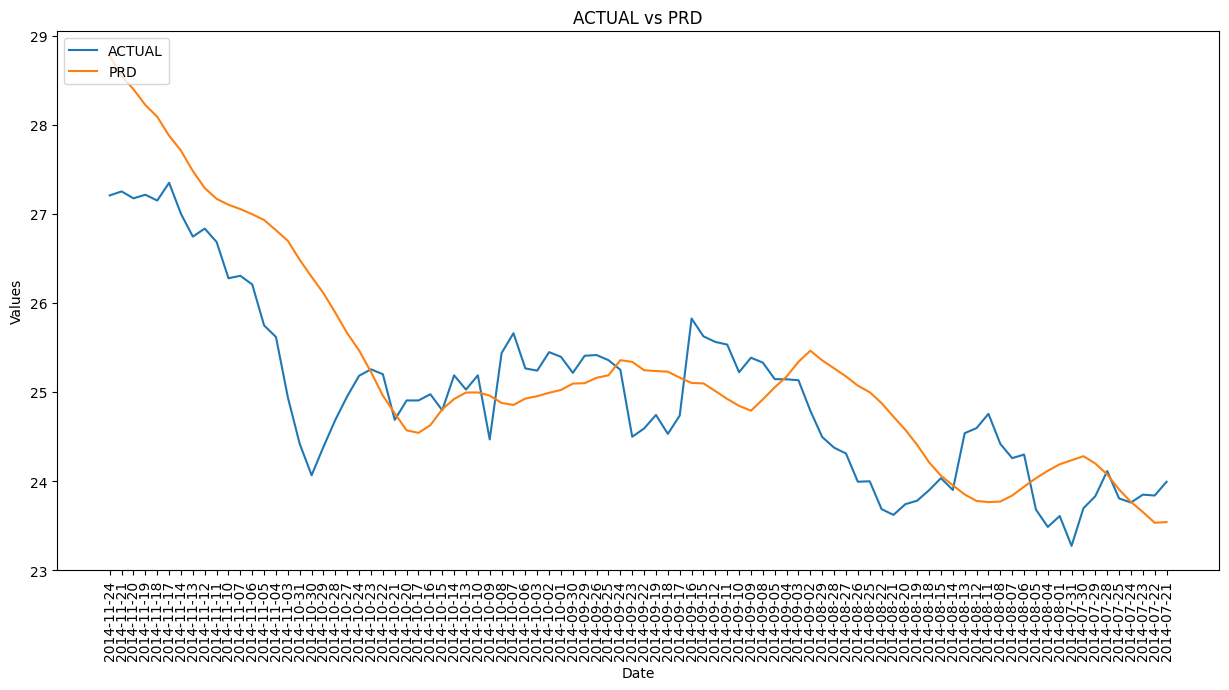

...............................................................................
             Stacked LSTM using the Epochs  30
...............................................................................

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5284.7568
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 30.4145
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 19.4162
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 17.8192
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 16.9058
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 15.5491
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 13.2040
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 11.8825
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 8.1109
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 7.8179
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 6.3505
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step 

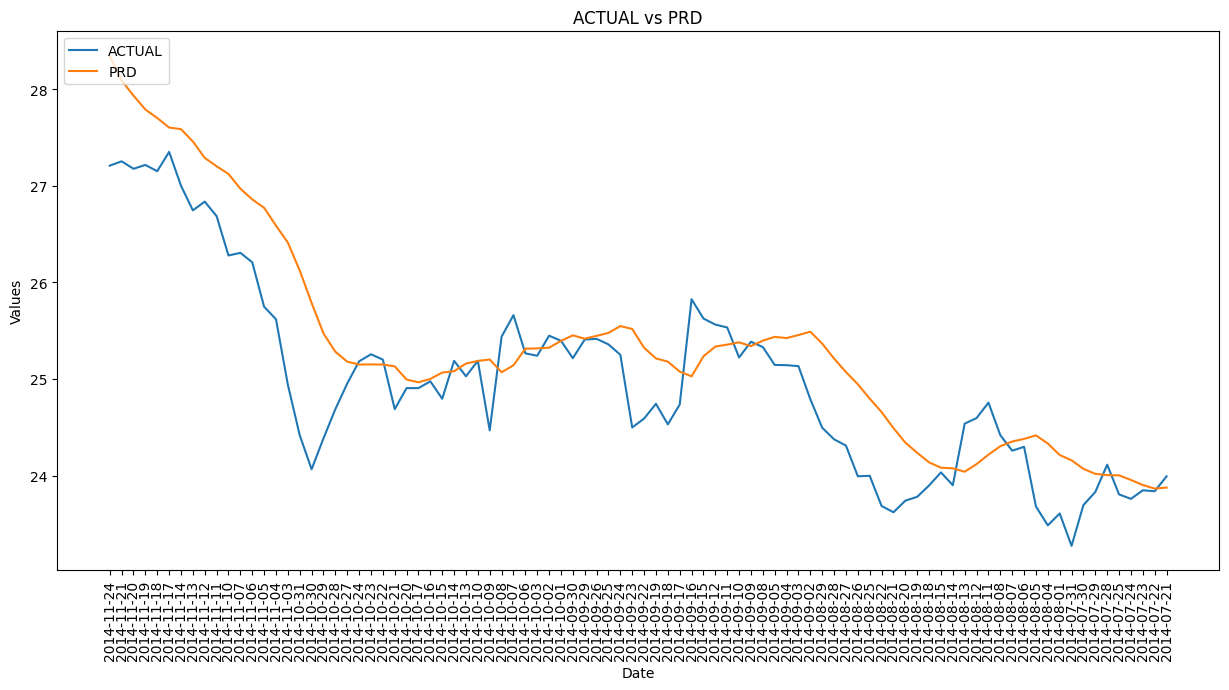

...............................................................................
             Stacked LSTM using the Epochs  50
...............................................................................

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 4568.6343
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 36.4730
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 29.6731
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 13.0718
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 10.2526
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 8.9659
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 9.5503
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 7.3862
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 7.2257
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 10.7641 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 7.0614
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/ste

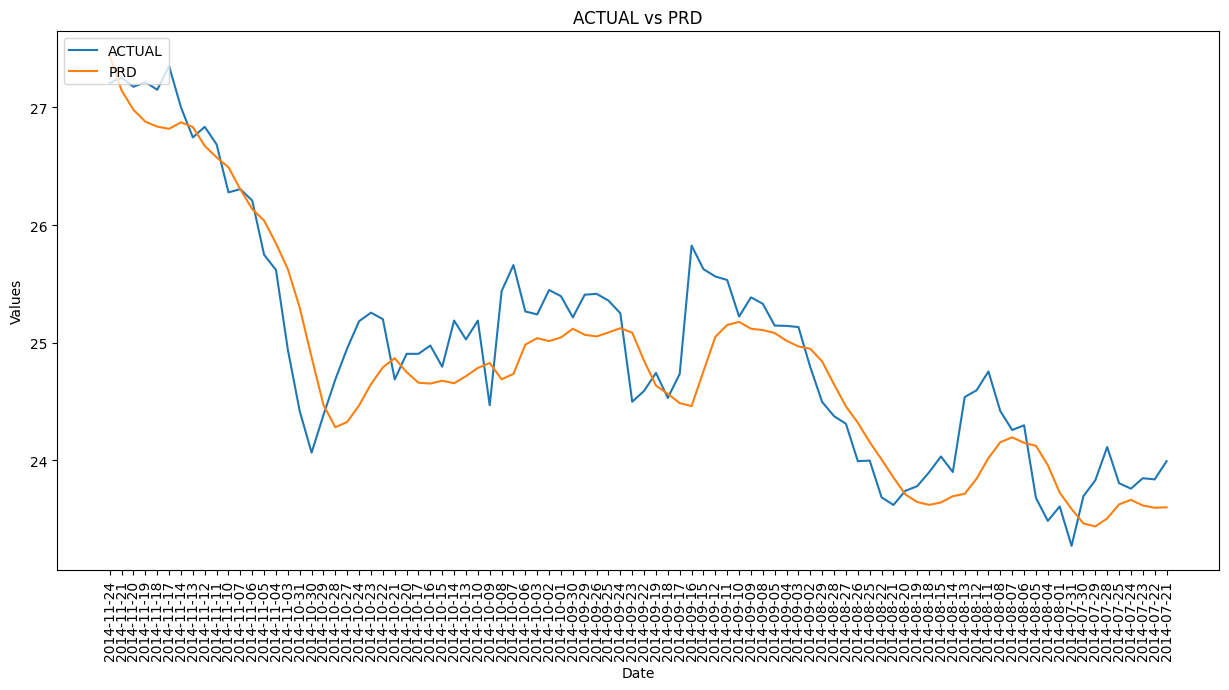

In [ ]:
for apprcd_ephs in [20, 30, 50]:
  print("...............................................................................")
  print("             Stacked LSTM using the Epochs ", apprcd_ephs)
  print("...............................................................................\n")
  apprcdrmdle = apprcsqntl()
  apprcdrmdle.add(apprclngtm(200, input_shape=(None,1), activation=appr_actvnfct, return_sequences=True))
  apprcdrmdle.add(apprclngtm(100, input_shape=(None,1), activation=appr_actvnfct))
  apprcdrmdle.add(apprcdse(1))

  apprcdrmdle.compile(loss= apprce_lsfctn, optimizer= 'adamax')
  apprcdrhstry = apprcdrmdle.fit(apprc_stkXt, apprc_stkYt, epochs = apprcd_ephs, batch_size = 200)
  apprcdrprd = apprcdrmdle.predict(apprc_stkXs)

  print("\nEvaluation of Apple Stock on Stacked-LSTM\n")

  print("Score of R2   :", apprcr2scr(apprc_stkYs, apprcdrprd)*100)
  print("Score of MAE  :", apprcmanse(apprc_stkYs, apprcdrprd))
  print("Score of MSE  :", apprcmansqr(apprc_stkYs, apprcdrprd))
  print("Score of RMSE :", apprcmth.sqrt(apprcmansqr(apprc_stkYs, apprcdrprd)))
  print(" ************************ ")

  # dataframe
  apprcepd_DF = apprcepd_pdsn.DataFrame()
  apprcepd_DF['ACTUAL']=apprc_stkYs_LT.tolist()
  apprcepd_DF['PRD']=apprcdrprd.tolist()
  apprcepd_DF['Date']=Prec_Tessk_D
  apprcepd_DF=apprcepd_DF.set_index("Date")
  print(apprcepd_DF)

  ### ACTUAL vs PRD
  apprcep_mplit.figure(figsize=(15, 7))
  apprcep_mplit.xlabel("Date")
  apprcep_mplit.ylabel("Values")
  apprcep_mplit.title("ACTUAL vs PRD")
  apprcep_mplit.xticks(rotation=90)
  apprcep_mplit.plot(apprcepd_DF['ACTUAL'], label="ACTUAL")
  apprcep_mplit.plot(apprcepd_DF['PRD'].tolist(), label="PRD")
  apprcep_mplit.legend(loc="upper left")
  apprcep_mplit.show()